# Pip install and pypi

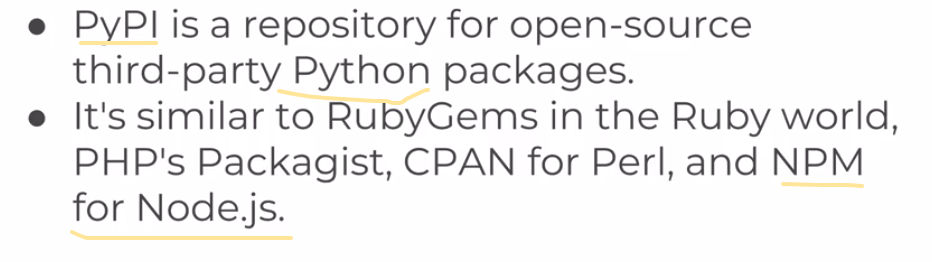

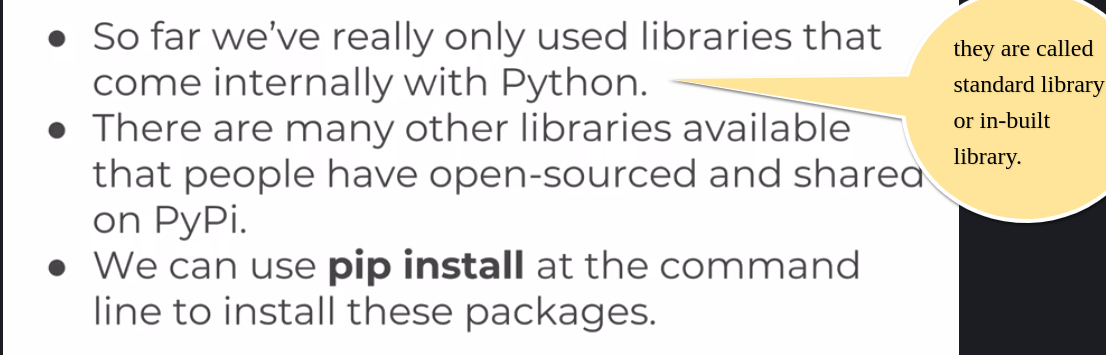

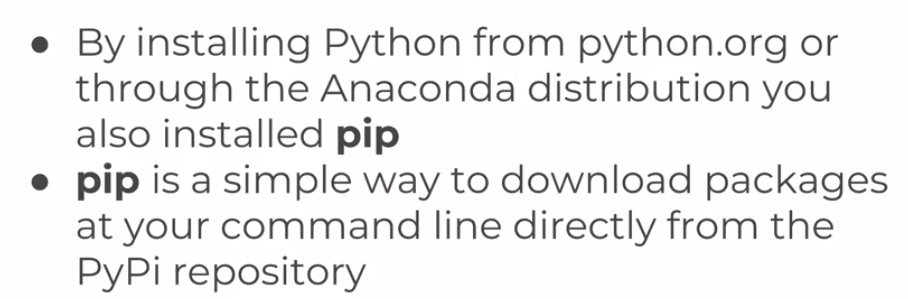


# Modules and Packages
In this section we briefly:
* code out a basic module and show how to import it into a Python script
* run a Python script from a Jupyter cell
* show how command line arguments can be passed into a script

Check out the video lectures for more info and resources for this.

The best online resource is the official docs:
https://docs.python.org/3/tutorial/modules.html#packages

But I really like the info here: https://python4astronomers.github.io/installation/packages.html

## Writing modules

In [1]:
%%writefile file1.py
def myfunc(x):
    return [num for num in range(x) if num%2==0]
list1 = myfunc(11)

Writing file1.py


**file1.py** is going to be used as a module.

Note that it doesn't print or return anything,
it just defines a function called *myfunc* and a variable called *list1*.
## Writing scripts

In [2]:
%%writefile file2.py
import file1
file1.list1.append(12)
print(file1.list1)

Writing file2.py


**file2.py** is a Python script.

First, we import our **file1** module (note the lack of a .py extension)<br>
Next, we access the *list1* variable inside **file1**, and perform a list method on it.<br>
`.append(12)` proves we're working with a Python list object, and not just a string.<br>
Finally, we tell our script to print the modified list.
## Running scripts

In [3]:
! python file2.py

[0, 2, 4, 6, 8, 10, 12]


Here we run our script from the command line. The exclamation point is a Jupyter trick that lets you run command line statements from inside a jupyter cell.

In [4]:
import file1
print(file1.list1)

[0, 2, 4, 6, 8, 10]


The above cell proves that we never altered **file1.py**, we just appended a number to the list *after* it was brought into **file2**.

## Passing command line arguments
Python's `sys` module gives you access to command line arguments when calling scripts.

In [5]:
%%writefile file3.py
import sys
import file1
num = int(sys.argv[1])
print(file1.myfunc(num))

Writing file3.py


Note that we selected the second item in the list of arguments with `sys.argv[1]`.<br>
This is because the list created with `sys.argv` always starts with the name of the file being used.<br>

In [6]:
! python file3.py 21

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


Here we're passing 21 to be the upper range value used by the *myfunc* function in **list1.py**

## Understanding modules

Modules in Python are simply Python files with the .py extension, which implement a set of functions. Modules are imported from other modules using the <code>import</code> command.

To import a module, we use the <code>import</code> command. Check out the full list of built-in modules in the Python standard library [here](https://docs.python.org/3/py-modindex.html).

The first time a module is loaded into a running Python script, it is initialized by executing the code in the module once. If another module in your code imports the same module again, it will not be loaded twice but once only - so local variables inside the module act as a "singleton" - they are initialized only once.

If we want to import the math module, we simply import the name of the module:

In [7]:
# import the library
import math

In [8]:
# use it (ceiling rounding)
math.ceil(2.4)

3

## Exploring built-in modules
Two very important functions come in handy when exploring modules in Python - the <code>dir</code> and <code>help</code> functions.

We can look for which functions are implemented in each module by using the <code>dir</code> function:

In [9]:
print(dir(math))

['__doc__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'ceil', 'copysign', 'cos', 'cosh', 'degrees', 'e', 'erf', 'erfc', 'exp', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'pi', 'pow', 'radians', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc']


When we find the function in the module we want to use, we can read about it more using the <code>help</code> function, inside the Python interpreter:



In [10]:
help(math.ceil)

Help on built-in function ceil in module math:

ceil(...)
    ceil(x)
    
    Return the ceiling of x as an Integral.
    This is the smallest integer >= x.



## Writing modules
Writing Python modules is very simple. To create a module of your own, simply create a new .py file with the module name, and then import it using the Python file name (without the .py extension) using the import command.

## Writing packages
Packages are name-spaces which contain multiple packages and modules themselves. They are simply directories, but with a twist.

Each package in Python is a directory which MUST contain a special file called **\__init\__.py**. This file can be empty, and it indicates that the directory it contains is a Python package, so it can be imported the same way a module can be imported.

If we create a directory called foo, which marks the package name, we can then create a module inside that package called bar. We also must not forget to add the **\__init\__.py** file inside the foo directory.

To use the module bar, we can import it in two ways:

In [ ]:
# Just an example, this won't work
import foo.bar

In [ ]:
# OR could do it this way
from foo import bar

In the first method, we must use the foo prefix whenever we access the module bar. In the second method, we don't, because we import the module to our module's name-space.

The **\__init\__.py** file can also decide which modules the package exports as the API, while keeping other modules internal, by overriding the **\__all\__** variable, like so:

In [ ]:
__init__.py:

__all__ = ["bar"]